### PROJECT NAME - PLAYSTORE APP REVIEWS ANALYSIS

###### Play Store Data.csv: 
Contains all the details of the applications on Google Play. There are 4 features that describe a given app

#### PROJECT SUMMARY

In this our project we aimed to gather and analyze detailed information on apps in the Google Play Store in order to provide insights on app reviews, their scores and content.
We used pandas,numpy,matplotlib and also seaborn liberires to perfome logics for data cleaning and visualization.

A few thousands of new applications are regularly uploaded on Google play store. A huge number of designers working freely on designing the apps and making them successful. With the enormous challenge from everywhere throughout the globe, it is important for a developer to know whether he/she is continuing the correct way or not. Since most Play Store applications are free, the income model is very obscure and inaccessible regarding how the in-application buys, in-application adverts and memberships add to the achievement of an application. 
We have tried to discover the relationships among various attributes such as , what are the user reviews, rating of the application.

#### PROJECT STATEMENT

Explore and analysis the data to discover relationship between review,score and understand the sentimental analysis along with playing NLP techniques.

#### STEPS

1. Importing libraries
2. load the Data
3. Description of Data
4. Cleaning the Data
5. Relation between app and score
6. Sentiment analysis of user reviews

#### Importing libraries

In [107]:
# importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from transformers import AutoTokenizer
import re
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
import warnings

# Suppress all warnings
warnings.filterwarnings('ignore')

#### Load playstore data

In [108]:
# Reading the data
df = pd.read_csv('play_store_dataset.csv')
df

reviewId  \
0       21ab88b4-baad-40b4-a52c-13ebae1e1d7e   
1       a099874d-04f2-4cf3-bfd9-61d6ab33dc29   
2       16ccf4b6-82f9-4427-aaba-86378233c708   
3       96fc9efd-b955-42d3-ad12-c320199820be   
4       2059a7da-9d5c-4f63-9652-3e58c900fa3d   
...                                      ...   
199995  3bdf097b-1396-4f69-9a28-7f6973ba3b36   
199996  4ac56786-c4e1-40c7-8128-575bab08740e   
199997  9a6d8139-bbbb-4885-a133-9cb48454641e   
199998  05bd8199-45bd-476d-9210-3ba78450229b   
199999  4b3de50b-e36d-4639-90b5-9fc41b6895f9   

                                                  content  score       app  
0                                                    Good      5  Facebook  
1                                      My choice facebook      5  Facebook  
2                                               Nice Apps      5  Facebook  
3       reason I do NOT WANT AI in any shape or form, ...      2  Facebook  
4                                           nice Facebook      5  Facebook  
...                                                   ...    ...       ...  
199995  I want line to have webtoon feature in app bec...      5      LINE  
199996  อยากให้แอนดรอยด์สามารถล็อคอินไลน์ได้ 2 device ...      3      LINE  
199997  Excuse me, i update my line apps but i can not...      5      LINE  
199998  I hate this new forced screen format. I want t...      1      LINE  
199999  Ga bisa login diakun sendiri, sangat mengecewa...      1      LINE  

[200000 rows x 4 columns]

#### Main dataset

This file contains data on the Google Play applications. It has 200000 rows of data with the following columns:
###### reviewId: Id of the app user.
###### content:The number of user reviews each app has received.
###### score:How users rate the app out of 5, with 1 being the lowest rating and 5 being the highest.
###### app:Name of the app

#### EXPLORATORY DATA ANALYSIS

#### Description of data

In [109]:
# information about dataset.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   reviewId  200000 non-null  object
 1   content   199965 non-null  object
 2   score     200000 non-null  int64 
 3   app       200000 non-null  object
dtypes: int64(1), object(3)
memory usage: 6.1+ MB
None


In [110]:
# Statistical descrption about dataset
print(df.describe())

               score
count  200000.000000
mean        3.804015
std         1.649700
min         1.000000
25%         2.000000
50%         5.000000
75%         5.000000
max         5.000000


In [111]:
# counting the number of null values in the dataset.
print(df.isnull().sum())

reviewId     0
content     35
score        0
app          0
dtype: int64


#### Dropping null

In [112]:
# dropping null values in the datatset
df.dropna(inplace=True) 

In [113]:
# checking null values
print(df.isnull().sum())

reviewId    0
content     0
score       0
app         0
dtype: int64


In [114]:
# finding the information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 199965 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   reviewId  199965 non-null  object
 1   content   199965 non-null  object
 2   score     199965 non-null  int64 
 3   app       199965 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.6+ MB
None


### Data Visualisation

Used to visualize the distribution of numerical data and understand the underlying frequency distribution of a dataset

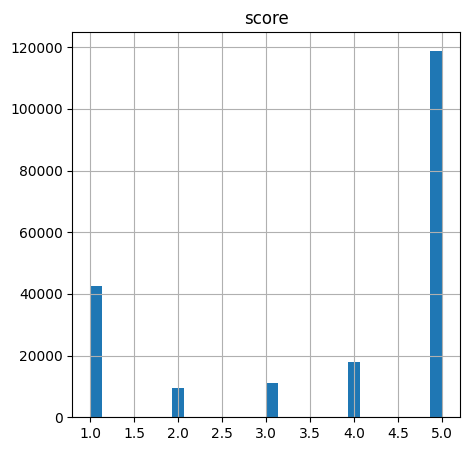

In [115]:
# Histogram
df.hist(figsize=(5,5), bins=30)
plt.show()

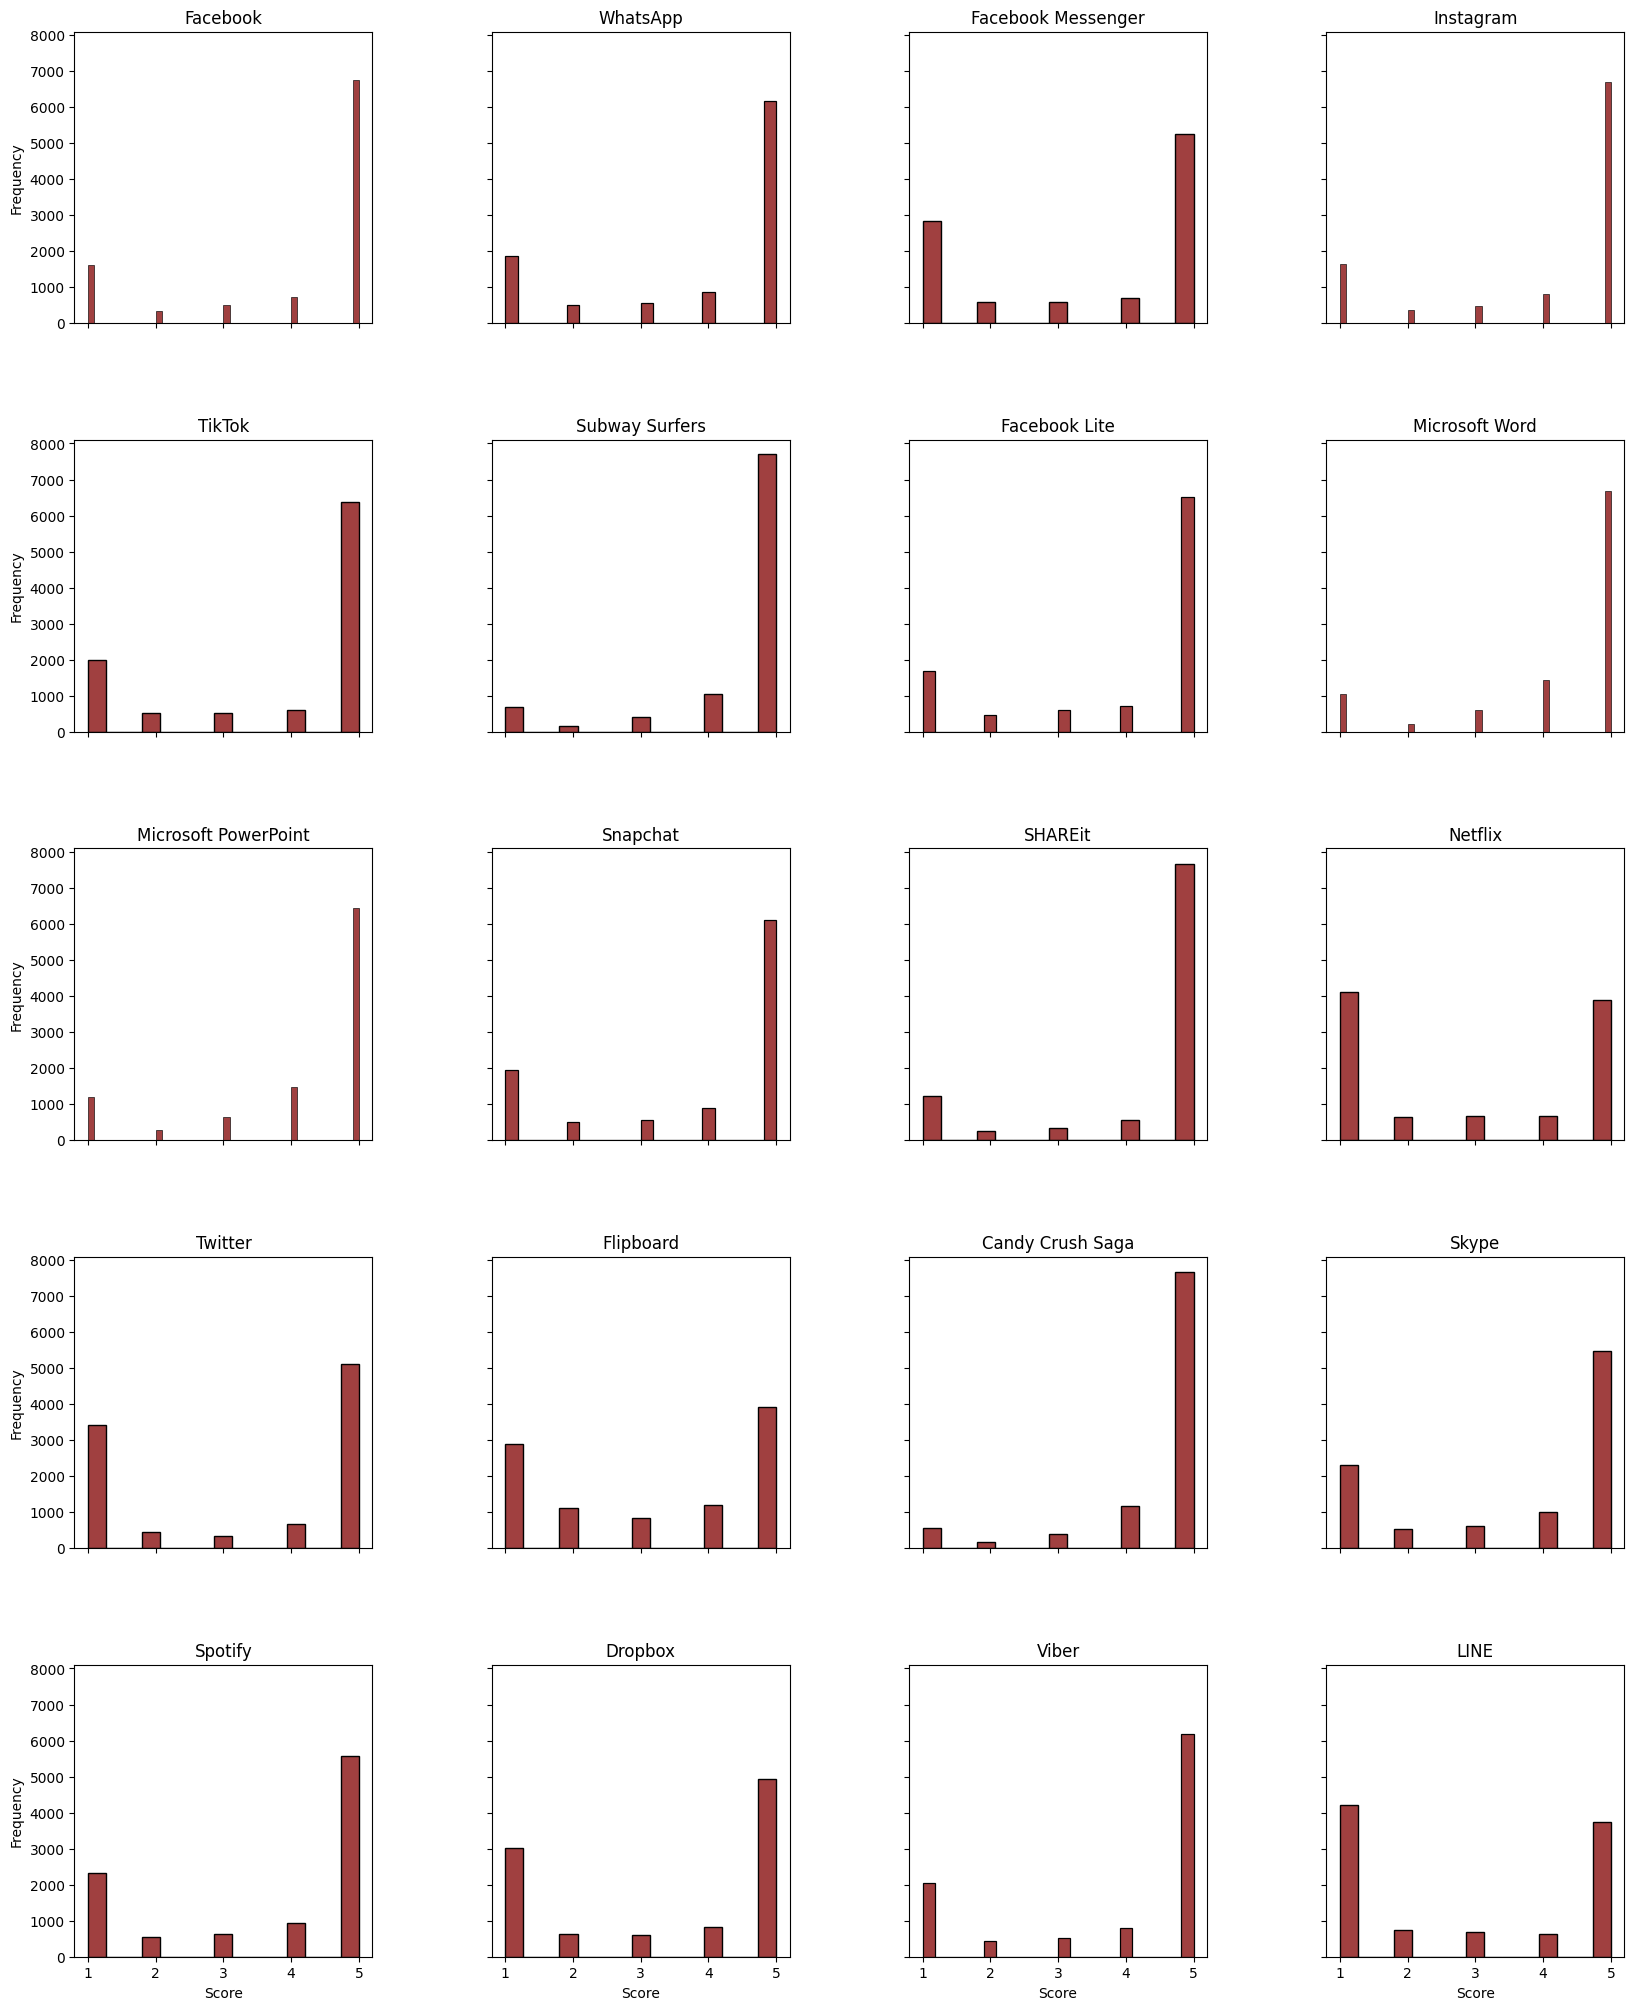

In [116]:
# Histogram showing unique apps and their corresponding frequency on scores
# Get unique apps
unique_apps = df['app'].unique()

# Define the number of rows and columns for the subplots
num_apps = len(unique_apps)
cols = 4  # Number of columns for the subplots
rows = (num_apps + cols - 1) // cols  # Calculate number of rows

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5), sharex=True, sharey=True)
fig.subplots_adjust(hspace=0.4, wspace=0.4)  # Adjust space between plots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot data for each app
for i, app in enumerate(unique_apps):
    ax = axes[i]
    sns.histplot(df[df['app'] == app]['score'], ax=ax, kde=False, color='maroon')
    ax.set_title(app)
    ax.set_xlabel('Score')
    ax.set_ylabel('Frequency')

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Display the plot
plt.show()


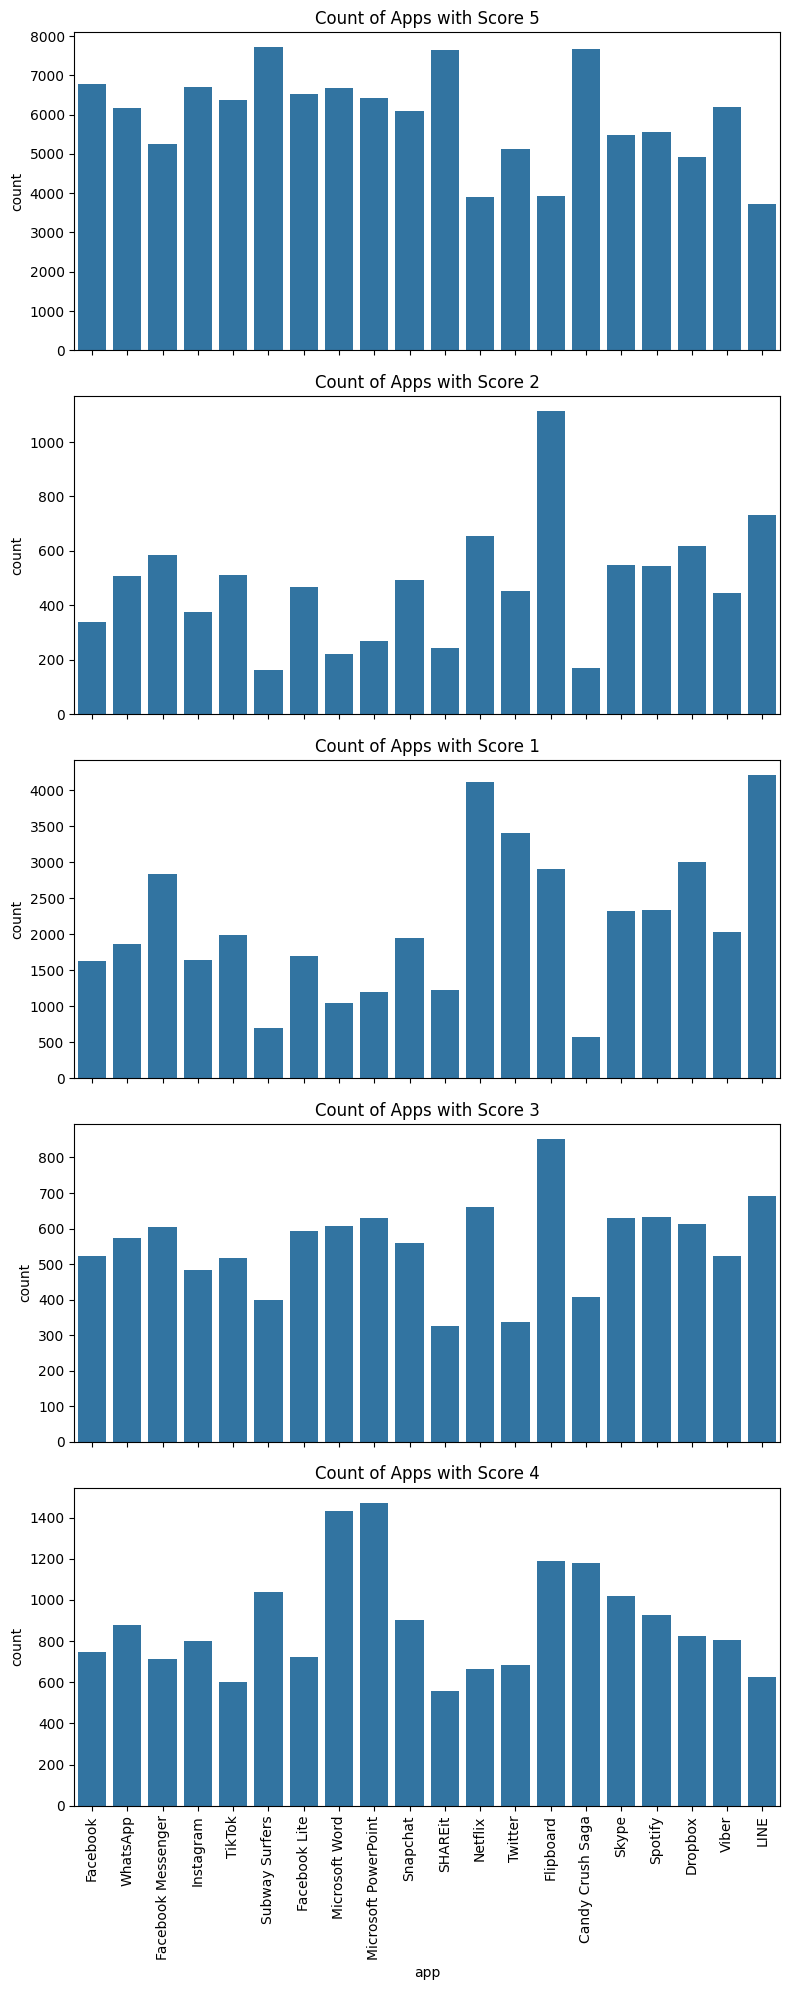

In [117]:
# Define the unique app scores
scores = df['score'].unique()

# Create subplots
fig, axes = plt.subplots(nrows=len(scores), ncols=1, figsize=(8, len(scores) * 4), sharex=True)

# Plot each score in a separate subplot
for i, score in enumerate(scores):
    sns.countplot(data=df[df['score'] == score], x='app', ax=axes[i])
    axes[i].set_title(f'Count of Apps with Score {score}')
    axes[i].tick_params(axis='x', rotation=90)  # Rotate x-axis labels for better readability

# Adjust layout
plt.tight_layout()
plt.show()


#####  Box Plot

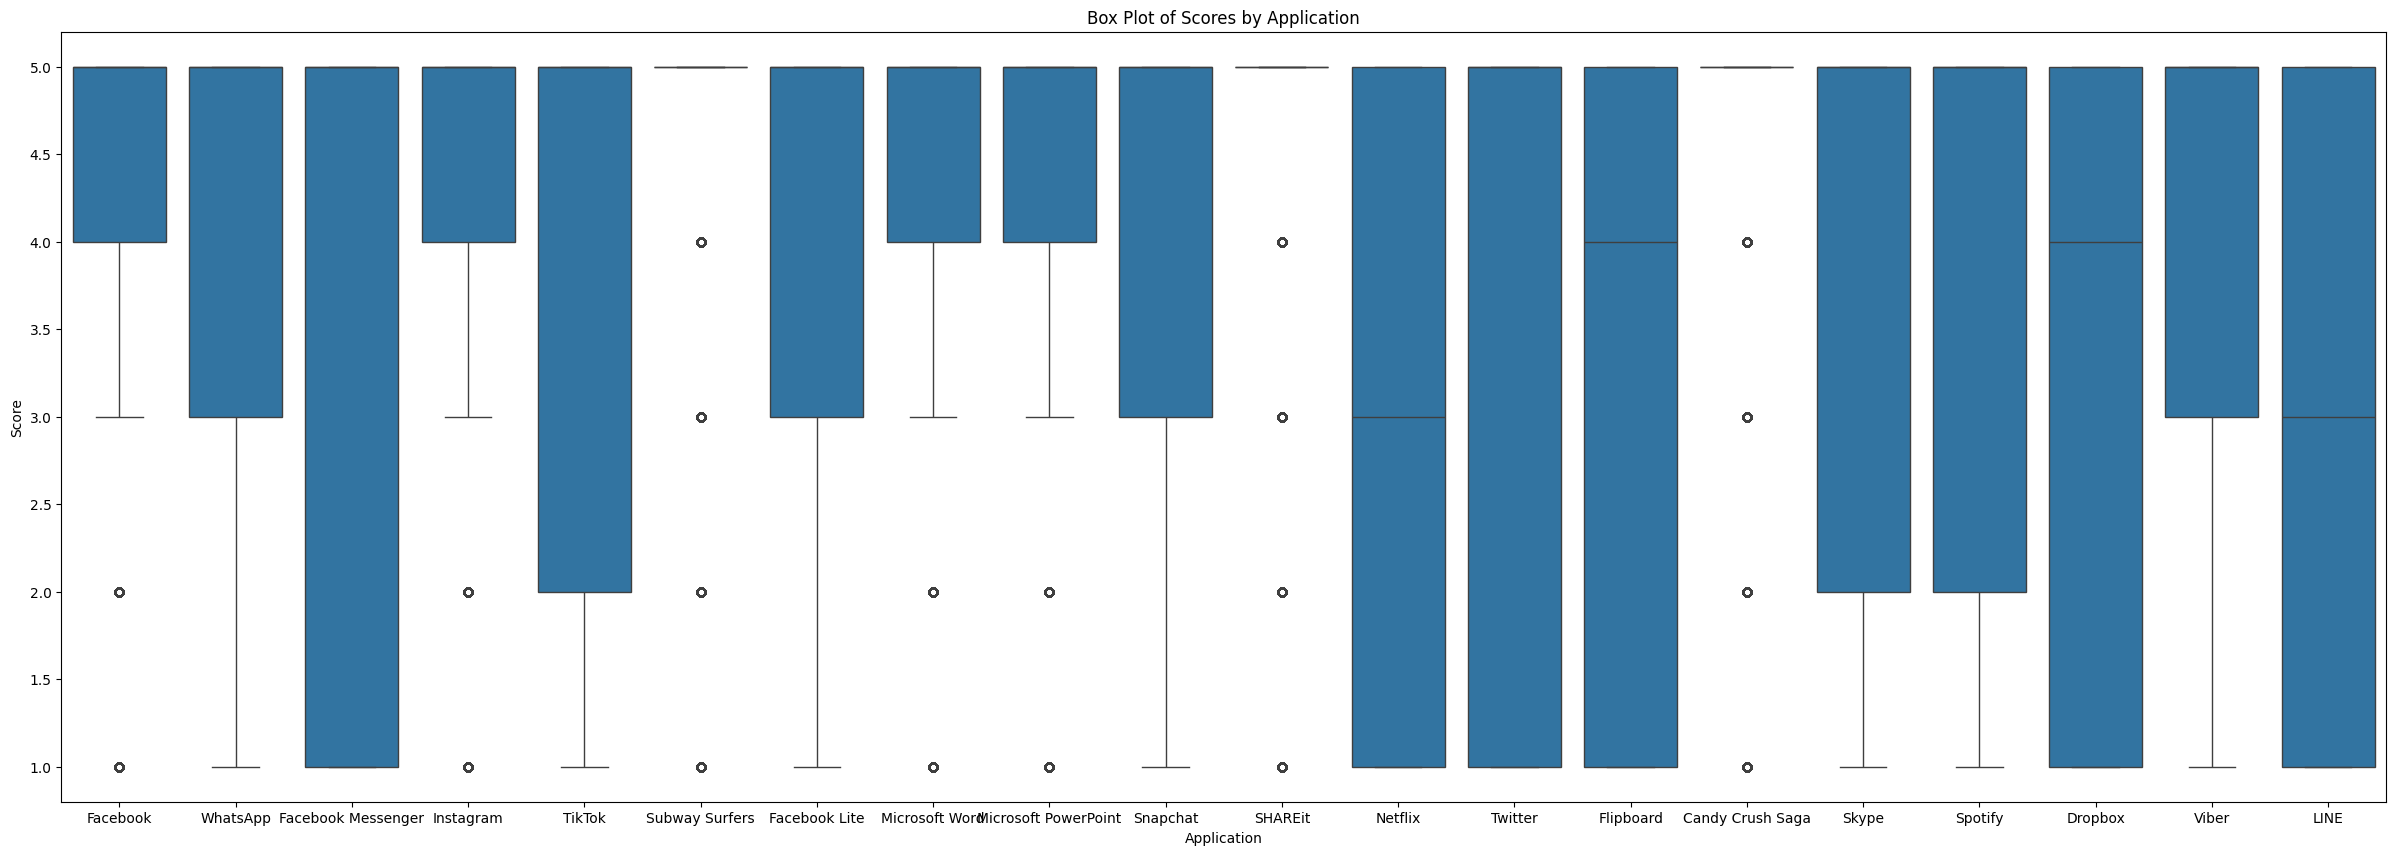

In [118]:
# Create a figure and axis
plt.figure(figsize=(30, 10))

# Create the box plot
sns.boxplot(x='app', y='score', data=df)

# Add title and labels for clarity
plt.title('Box Plot of Scores by Application')
plt.xlabel('Application')
plt.ylabel('Score')

# Display the plot
plt.show()

#### Label Encoding

In [119]:
# Label Encoding
df1=df.drop(["reviewId", "content"], axis="columns")
print(df1)
label_encoder = LabelEncoder()

# Fitting the data
df1['app'] = label_encoder.fit_transform(df1['app'])
print(df1)

        score       app
0           5  Facebook
1           5  Facebook
2           5  Facebook
3           2  Facebook
4           5  Facebook
...       ...       ...
199995      5      LINE
199996      3      LINE
199997      5      LINE
199998      1      LINE
199999      1      LINE

[199965 rows x 2 columns]
        score  app
0           5    2
1           5    2
2           5    2
3           2    2
4           5    2
...       ...  ...
199995      5    7
199996      3    7
199997      5    7
199998      1    7
199999      1    7

[199965 rows x 2 columns]


#### Correlation Matrix

###### Distribution of scores

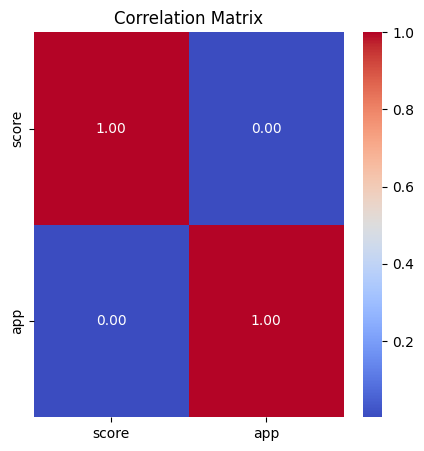

In [120]:
# Compute the correlation matrix
corr_matrix = df1.corr()
corr_matrix
# Plot the correlation matrix
plt.figure(figsize=(5,5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

From the correlation it is evident that there is no correlation between the two variables.

### Distribution  using kde Plot 

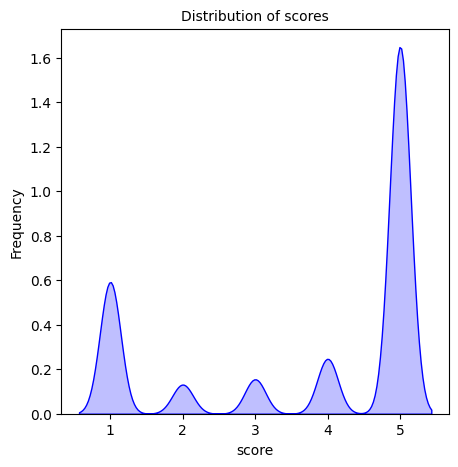

In [121]:
# Plotting the distribution of each score
plt.figure(figsize=(5,5))
plt.xlabel("score")
plt.ylabel("Frequency")
graph = sns.kdeplot(df.score, color="Blue", shade = True)
plt.title('Distribution of scores',size = 10);

### Distribution  using Violin Plot 

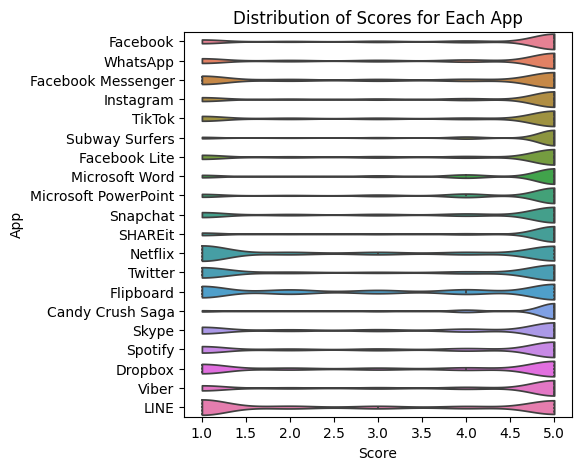

In [122]:
# Create a custom color palette with a distinct color for each app
custom_palette = sns.color_palette("husl", n_colors=len(df['app'].unique()))

# Distribution of Scores - Violin Plot
plt.figure(figsize=(5, 5))
sns.violinplot(x='score', y='app', data=df, palette=custom_palette, inner='quartile', cut=0)
plt.title('Distribution of Scores for Each App')
plt.xlabel('Score')
plt.ylabel('App')

# Show the plot
plt.show()


### SENTIMENT ANALYSIS

Sentiment analysis is a powerful technique used to determine the emotional tone behind a series of words

In [123]:
# Load your tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')


# Handle missing values
df['content'].fillna('', inplace=True)  # Or df.dropna(subset=['content'], inplace=True)

def preprocess_text(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return ''
    
    # Keep only alphabetic characters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single space
    
    return text

def tokenize_text(text):
    preprocessed_text = preprocess_text(text)
    return tokenizer.tokenize(preprocessed_text)

# Apply tokenization
df['tokens'] = df['content'].apply(tokenize_text)

# Print out the first few rows to verify
print(df.head())

                               reviewId  \
0  21ab88b4-baad-40b4-a52c-13ebae1e1d7e   
1  a099874d-04f2-4cf3-bfd9-61d6ab33dc29   
2  16ccf4b6-82f9-4427-aaba-86378233c708   
3  96fc9efd-b955-42d3-ad12-c320199820be   
4  2059a7da-9d5c-4f63-9652-3e58c900fa3d   

                                             content  score       app  \
0                                               Good      5  Facebook   
1                                 My choice facebook      5  Facebook   
2                                          Nice Apps      5  Facebook   
3  reason I do NOT WANT AI in any shape or form, ...      2  Facebook   
4                                      nice Facebook      5  Facebook   

                                              tokens  
0                                             [good]  
1                             [my, choice, facebook]  
2                                       [nice, apps]  
3  [reason, i, do, not, want, ai, in, any, shape,...  
4                          

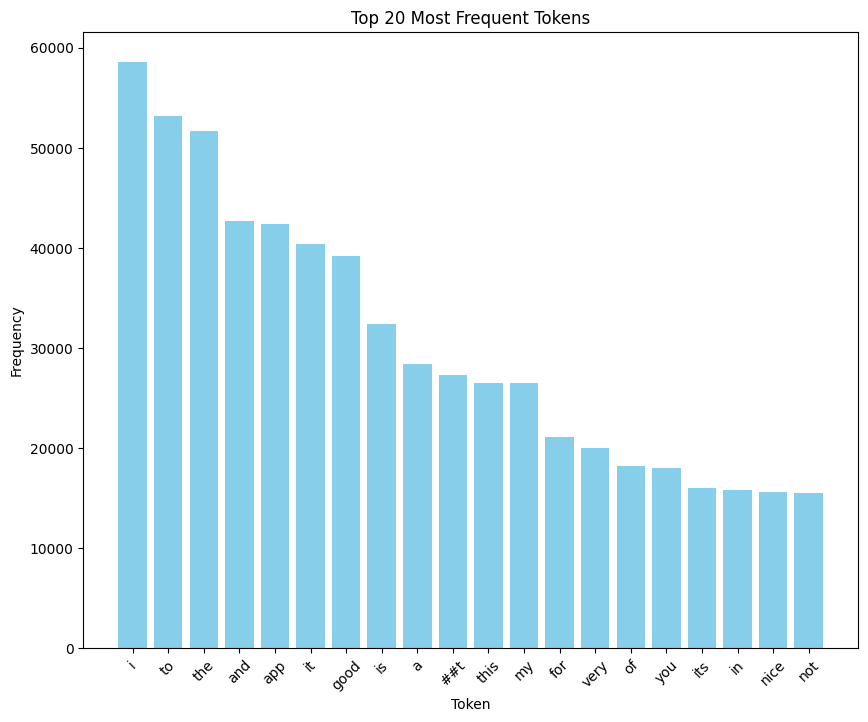

In [124]:
# Assuming df is your DataFrame and 'tokens' is the column with tokenized reviews

# Flatten the list of token lists into a single list of tokens
all_tokens = [token for sublist in df['tokens'] for token in sublist]

# Calculate token frequency distribution
token_freq = Counter(all_tokens)

# Convert to DataFrame for easier analysis
freq_df = pd.DataFrame(token_freq.items(), columns=['Token', 'Frequency'])
freq_df = freq_df.sort_values(by='Frequency', ascending=False)

# Plot the most common tokens
plt.figure(figsize=(10, 8))
top_n = 20  # Change this to the number of top tokens you want to display
top_tokens = freq_df.head(top_n)

plt.bar(top_tokens['Token'], top_tokens['Frequency'], color='skyblue')
plt.xlabel('Token')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Tokens')
plt.xticks(rotation=45)
plt.show()


### Word Cloud Visualization

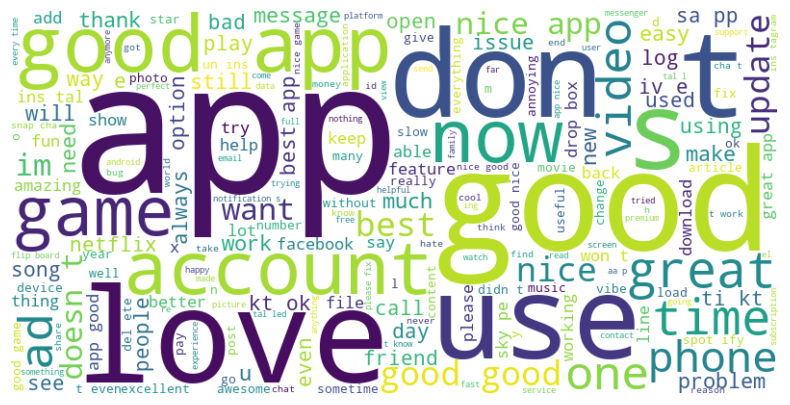

In [125]:
# Load your tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')

# Load your dataset
# df = pd.read_csv('path_to_your_reviews.csv')

# Handle missing values
df['content'].fillna('', inplace=True)  # Or df.dropna(subset=['content'], inplace=True)

def preprocess_text(text):
    # Ensure text is a string
    if not isinstance(text, str):
        return ''
    
    # Keep only alphabetic characters and spaces
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()  # Replace multiple spaces with a single space
    
    return text

def tokenize_text(text):
    preprocessed_text = preprocess_text(text)
    return tokenizer.tokenize(preprocessed_text)

# Apply tokenization
df['tokens'] = df['content'].apply(tokenize_text)

# Create a single string of all tokens
all_tokens = ' '.join([token for sublist in df['tokens'] for token in sublist])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### Word Cloud Visualization by App

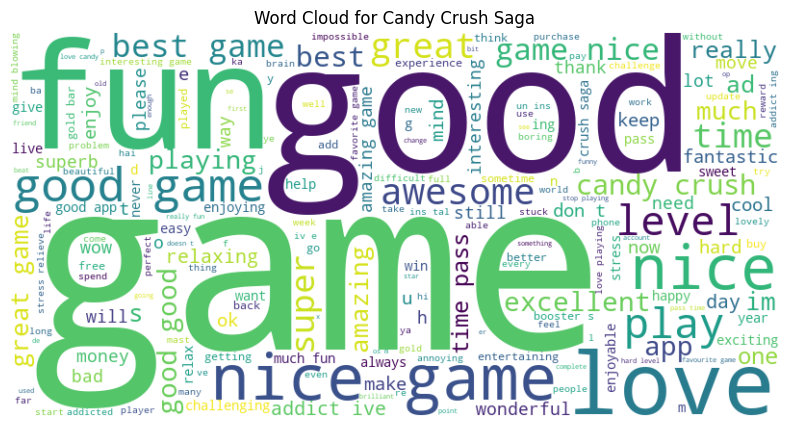

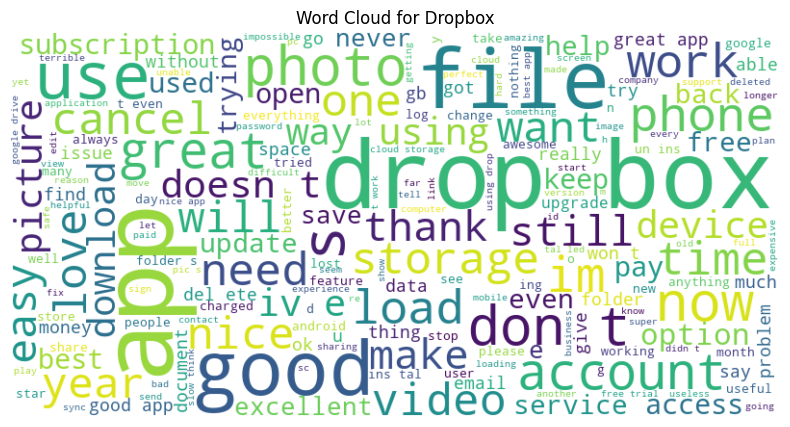

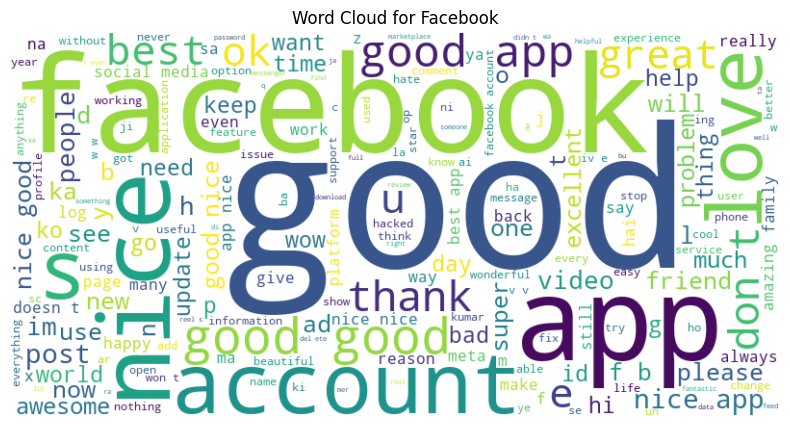

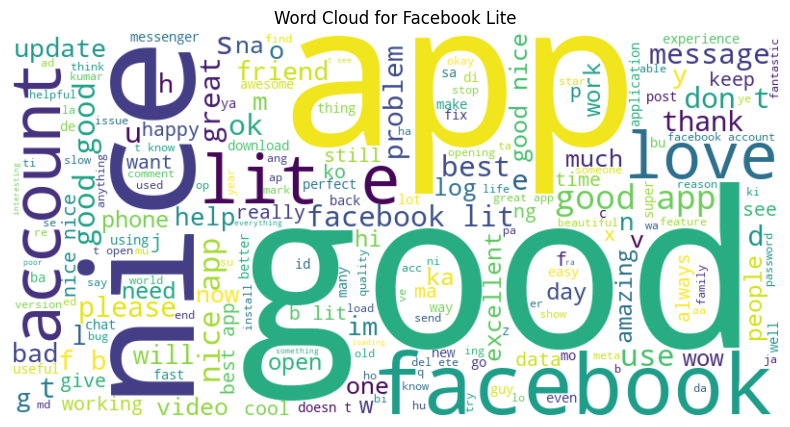

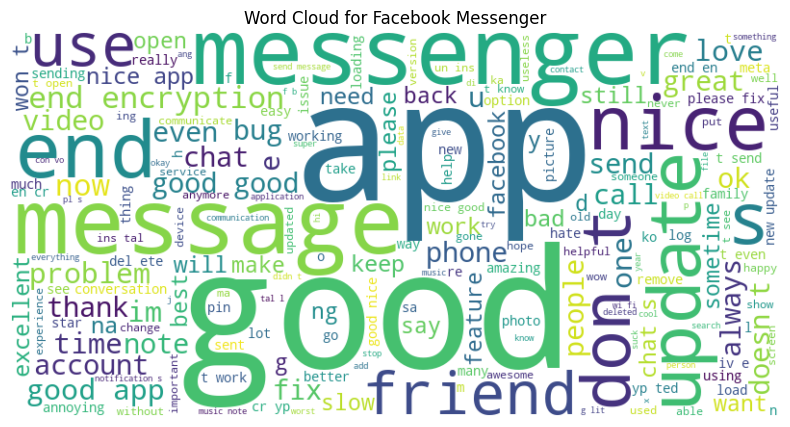

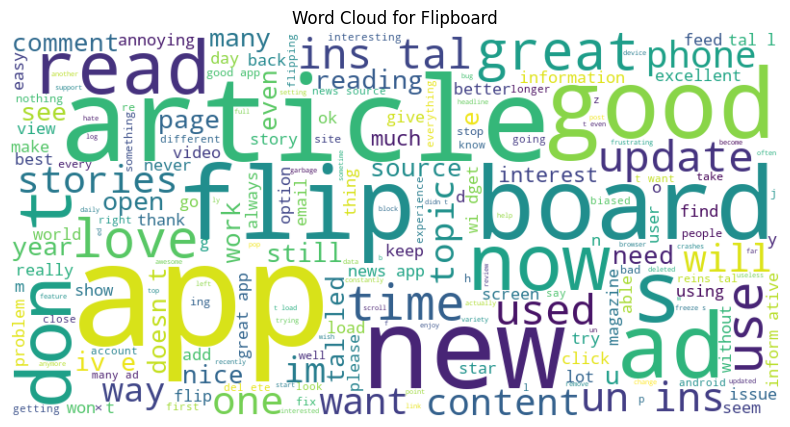

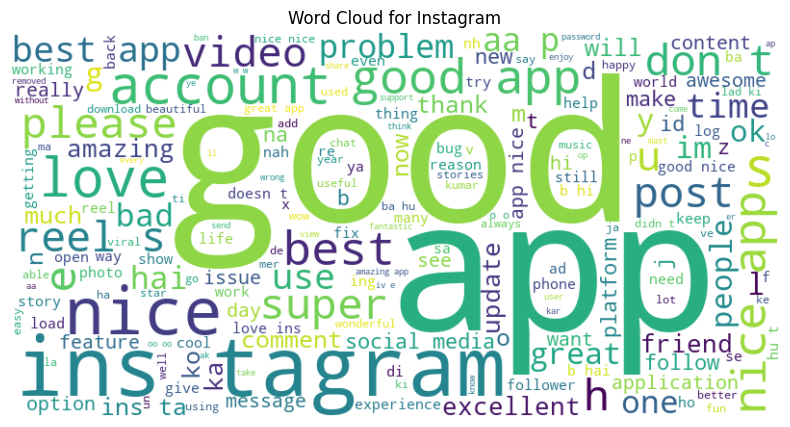

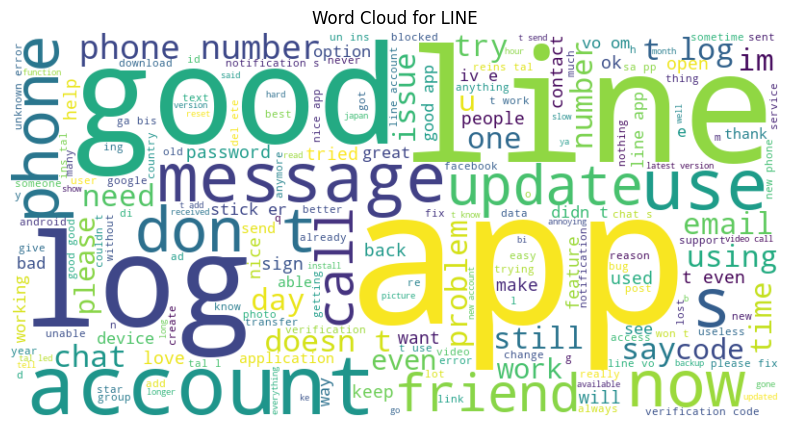

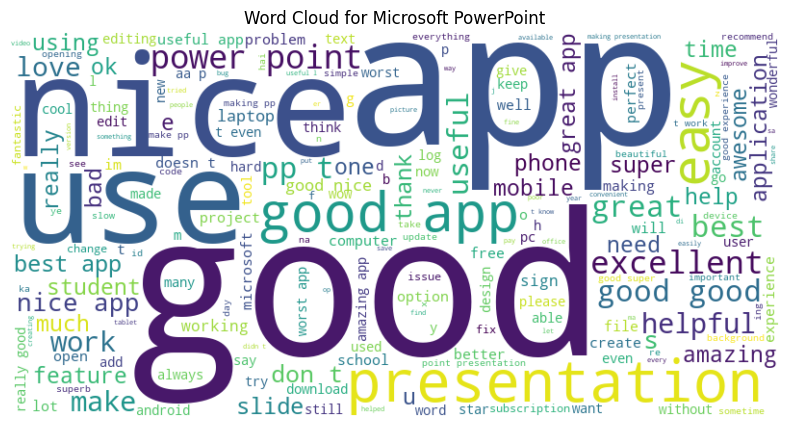

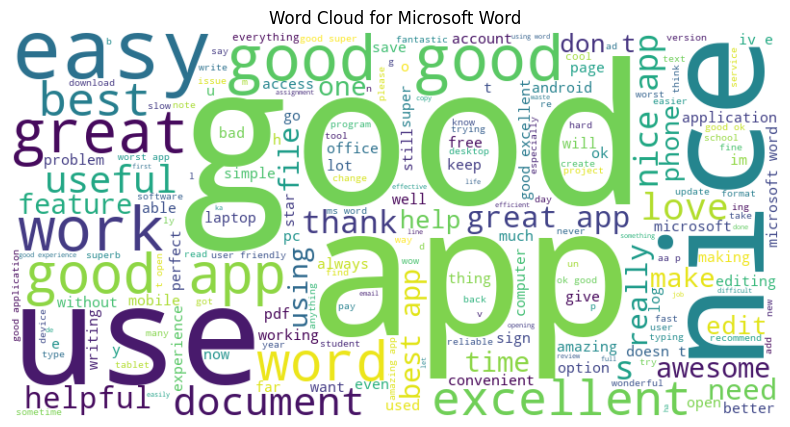

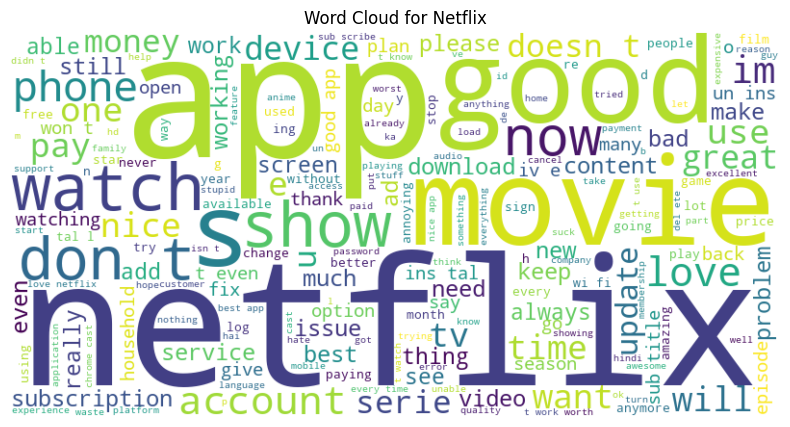

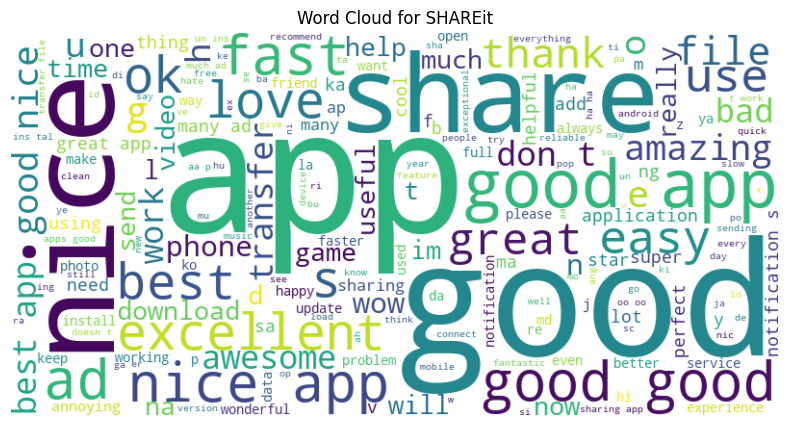

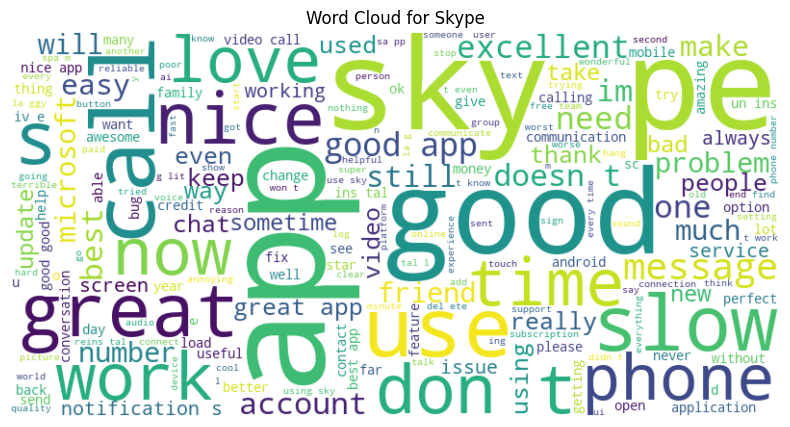

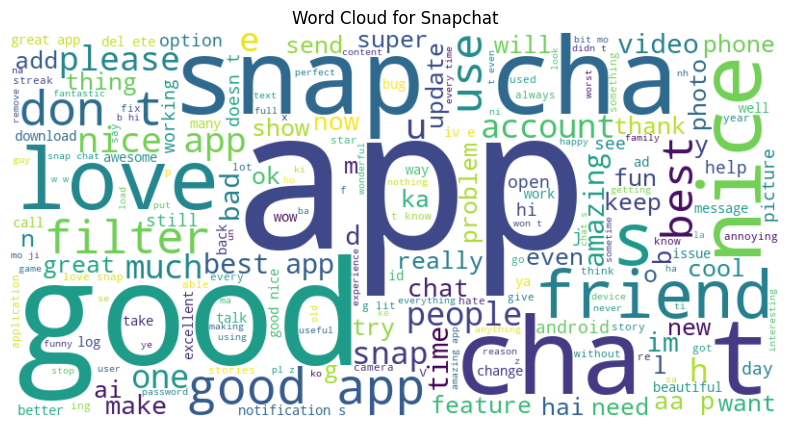

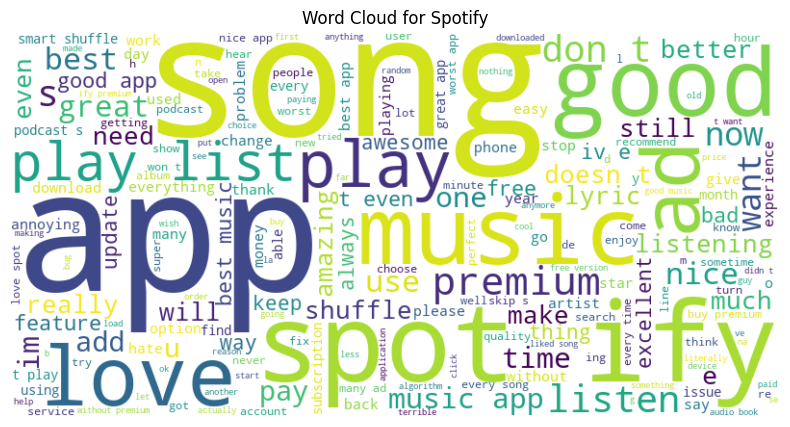

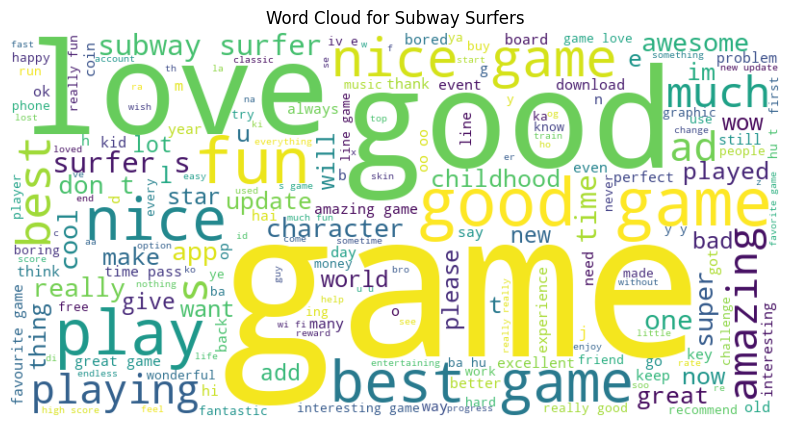

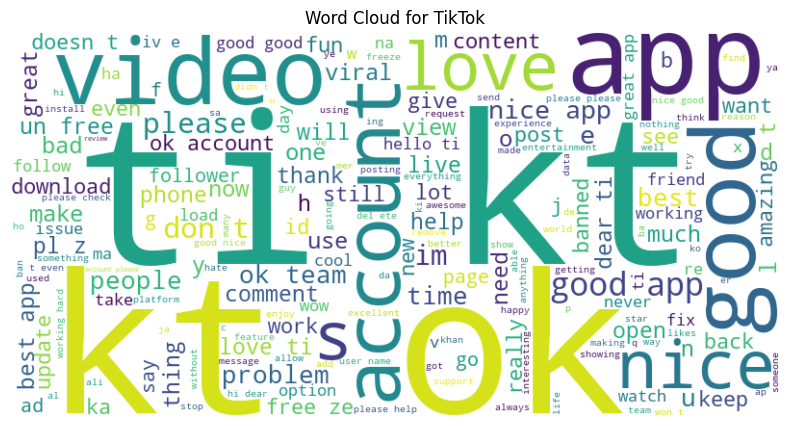

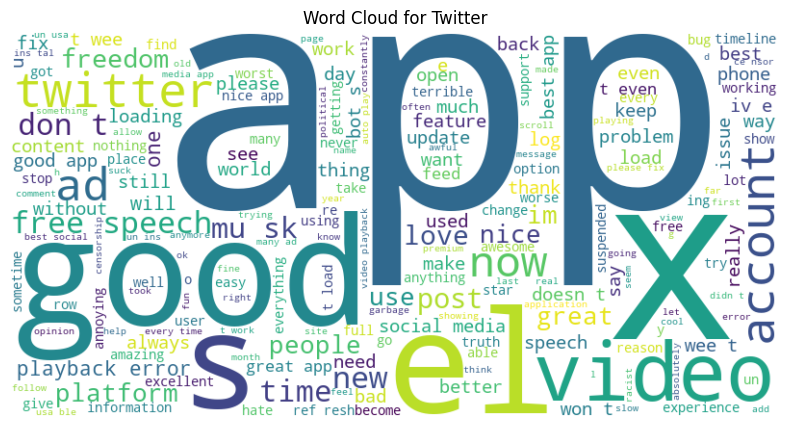

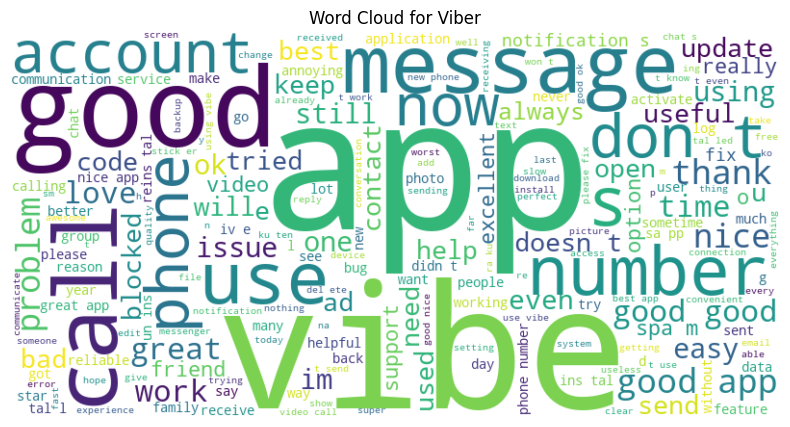

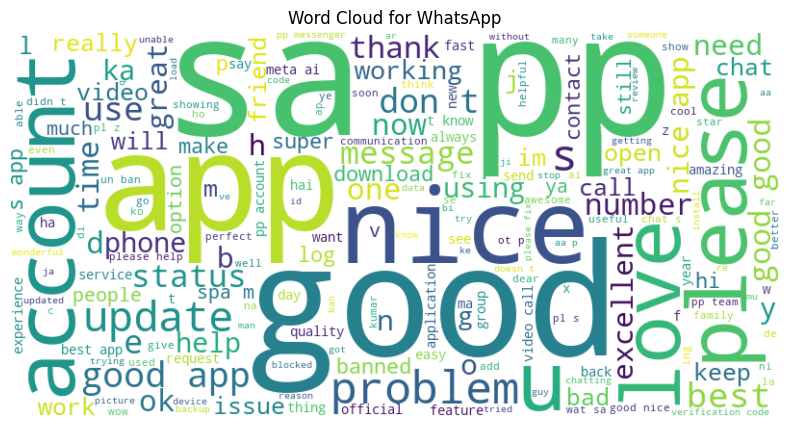

In [126]:
# Group by app (or category)
grouped_df = df.groupby('app')  # Change 'app' to your column name

# Generate and display word clouds for each app
for app, group in grouped_df:
    # Combine all tokens for this app
    all_tokens = ' '.join([token for sublist in group['tokens'] for token in sublist])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens)
    
    # Display the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for {app}')
    plt.show()


### Bar graphs for each app

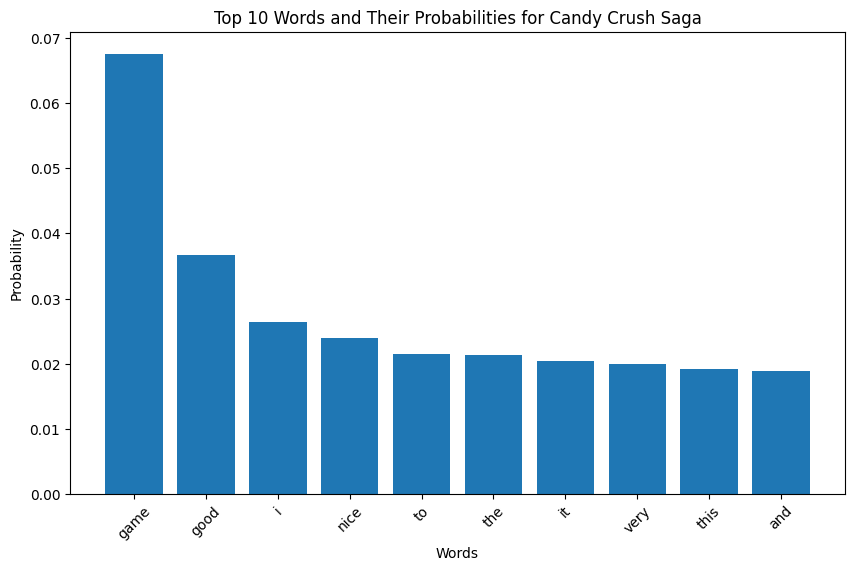

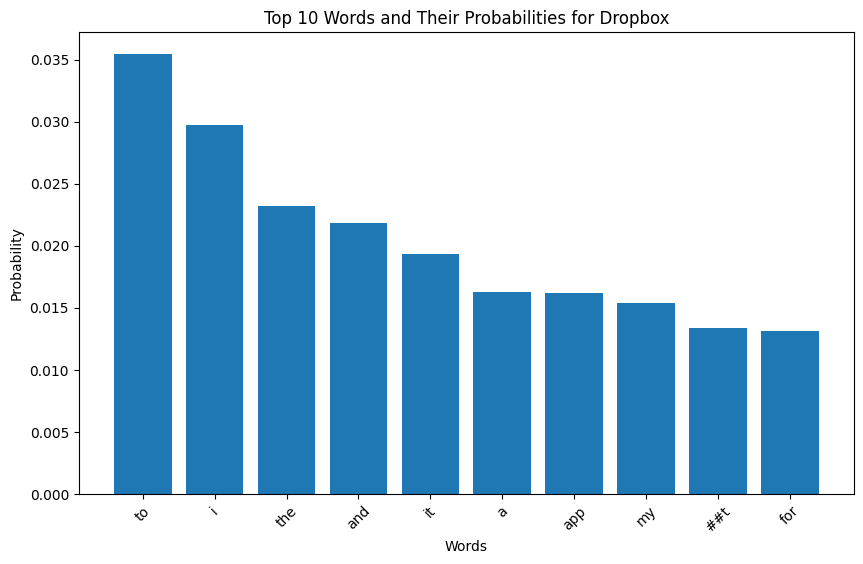

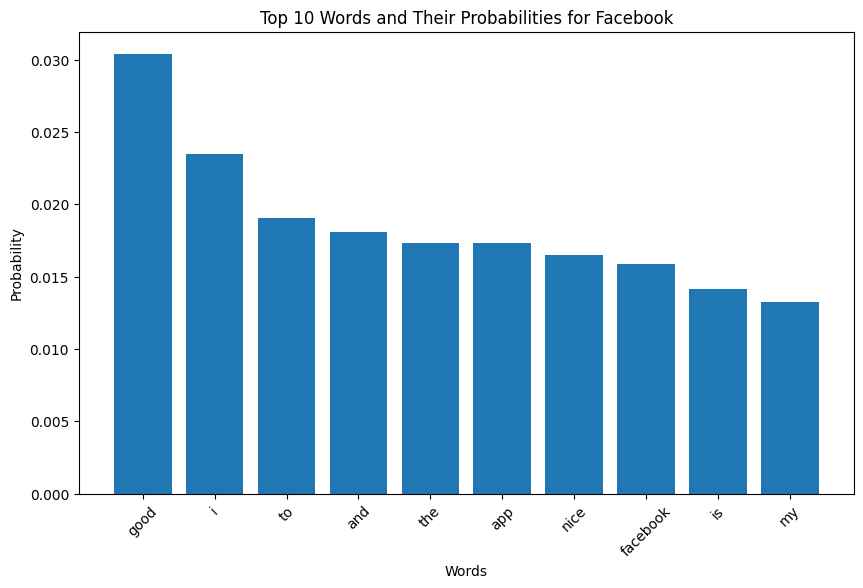

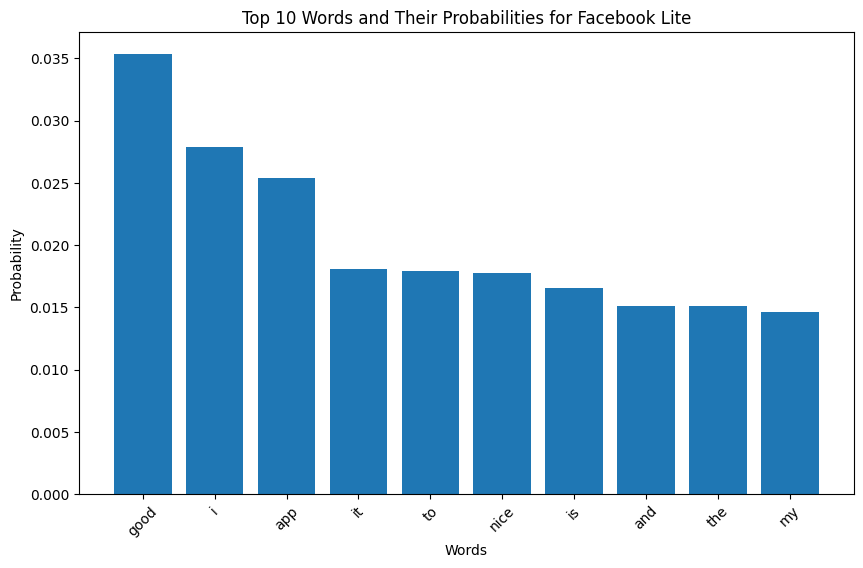

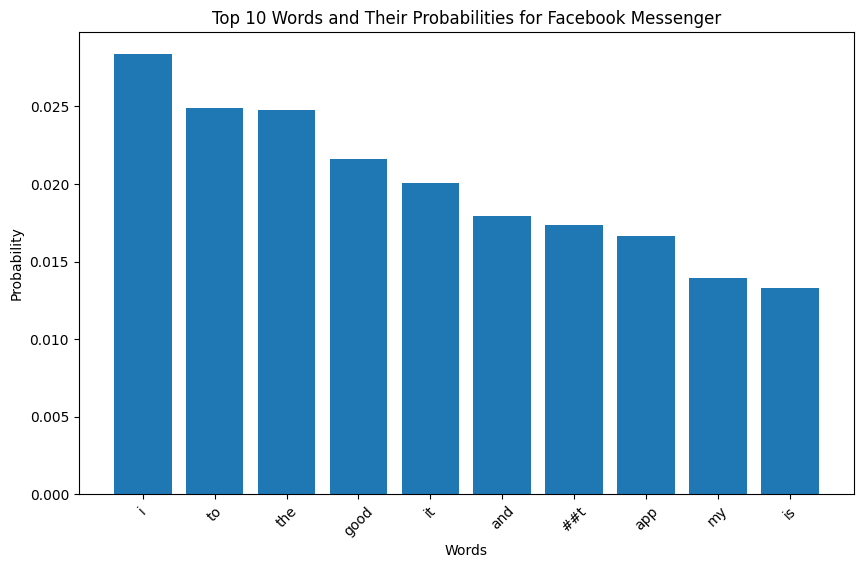

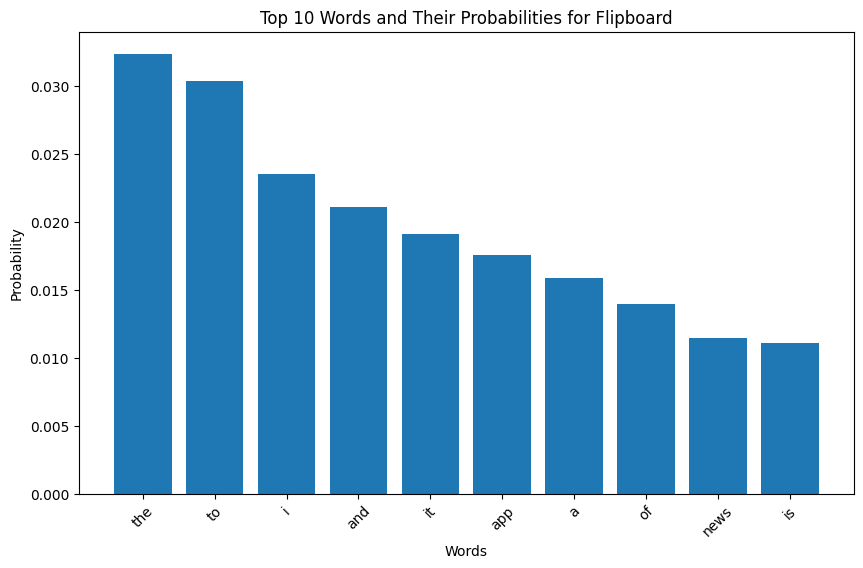

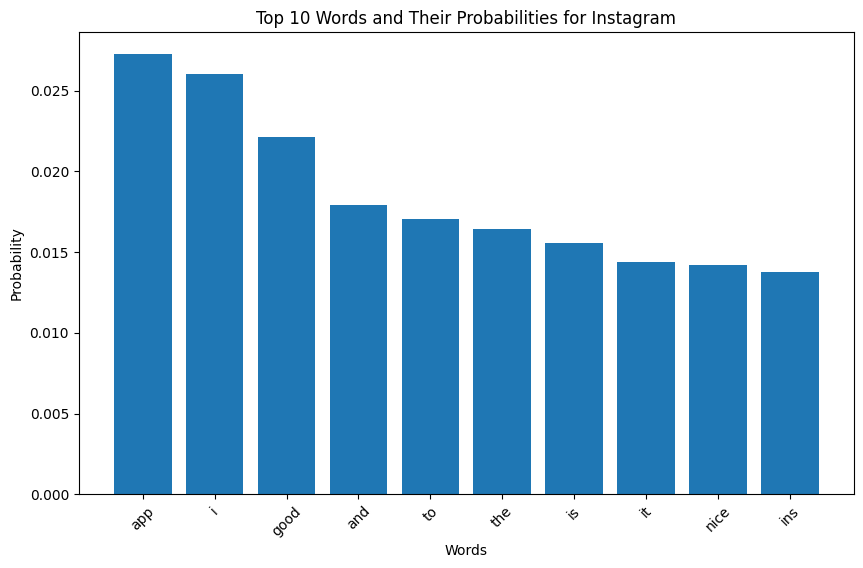

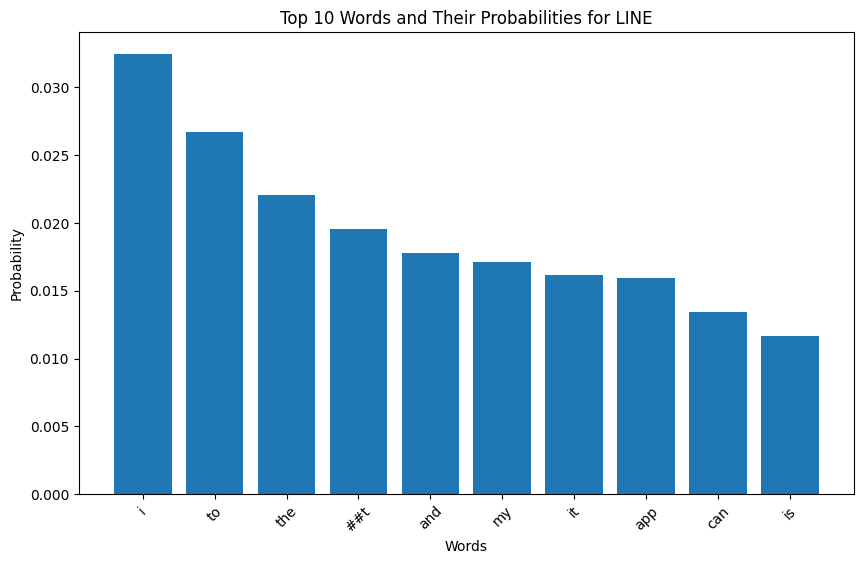

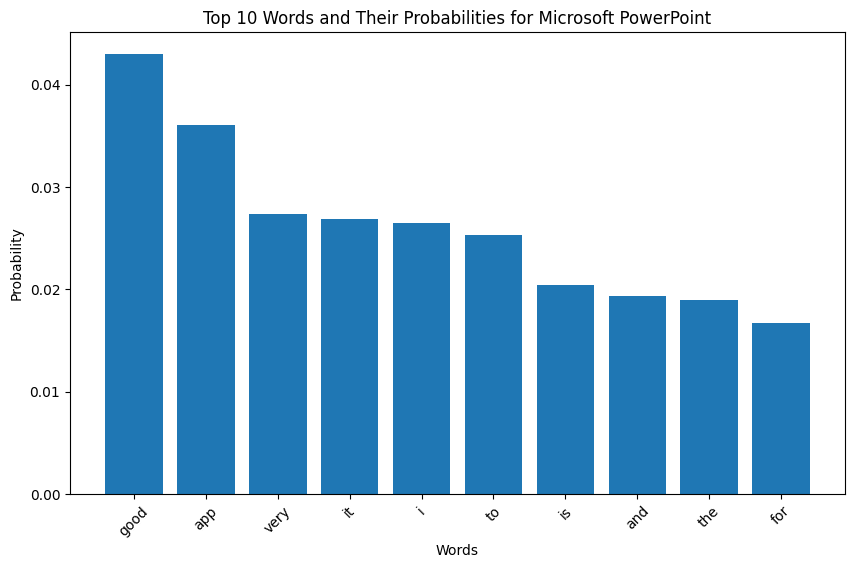

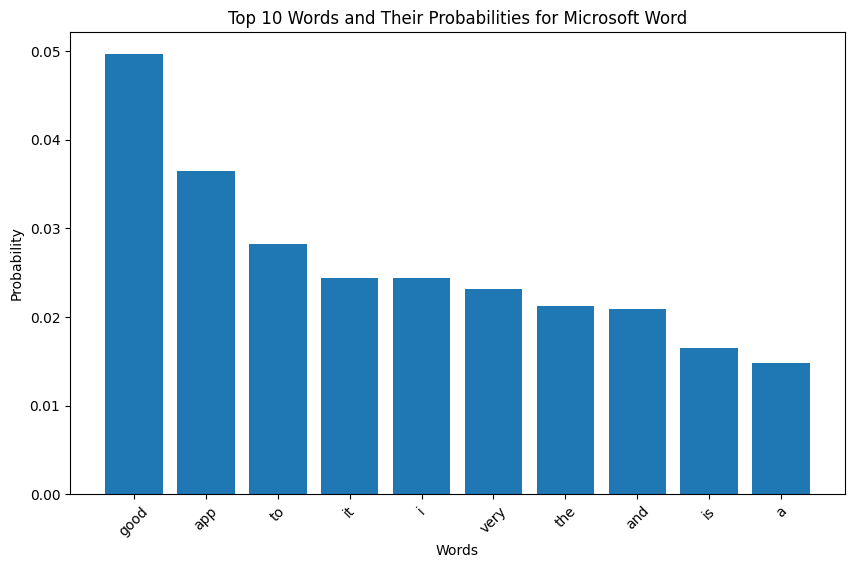

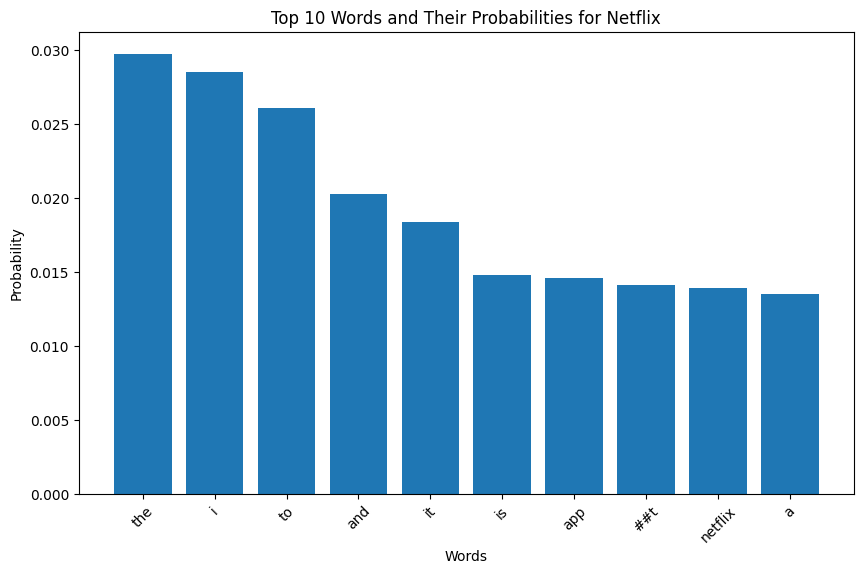

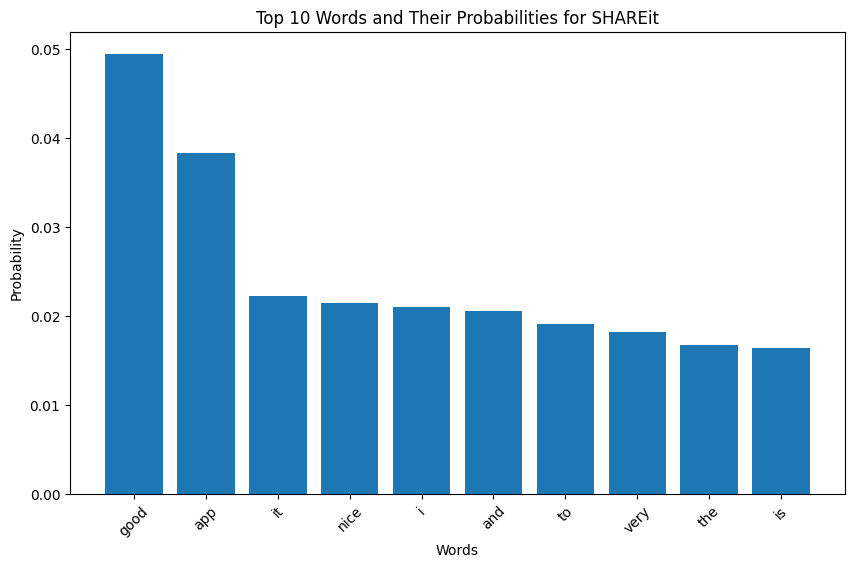

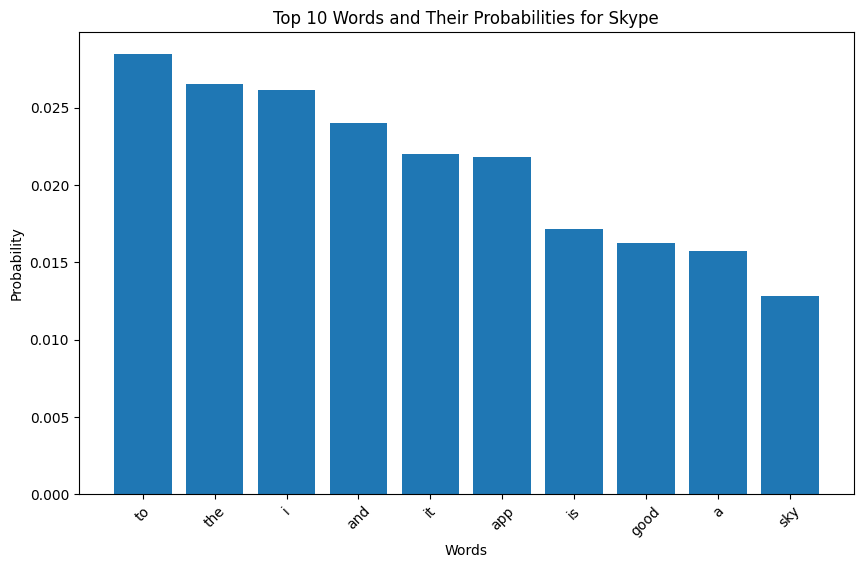

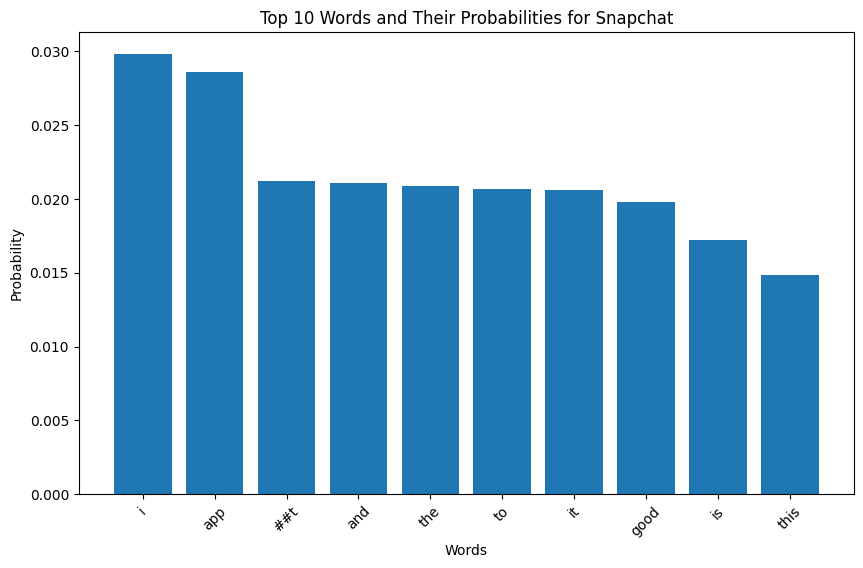

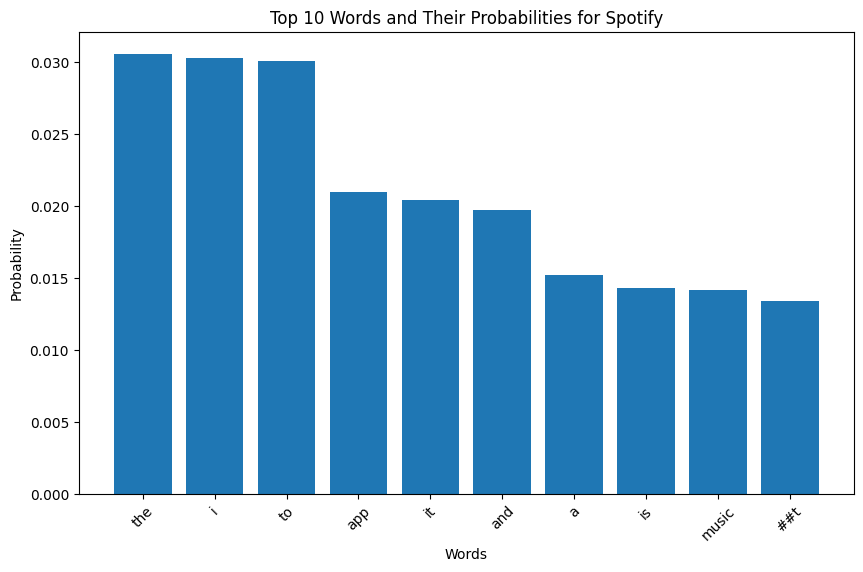

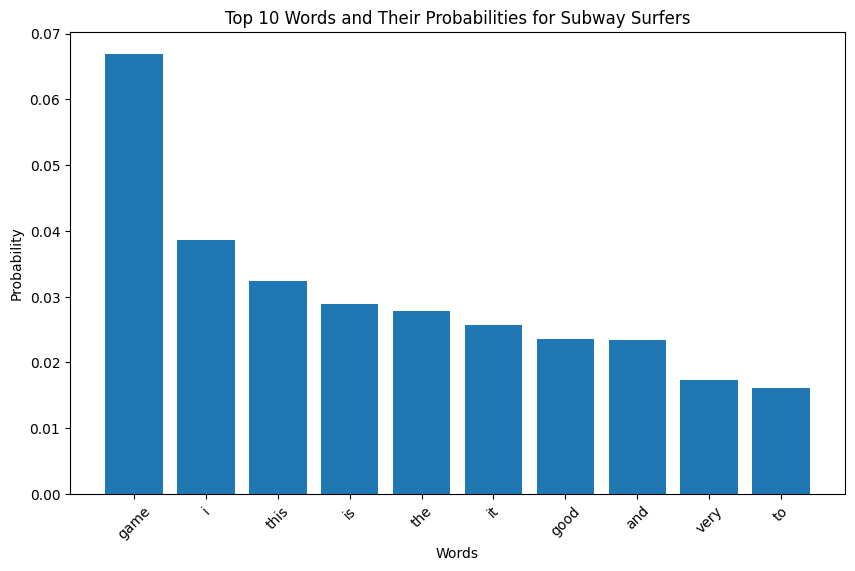

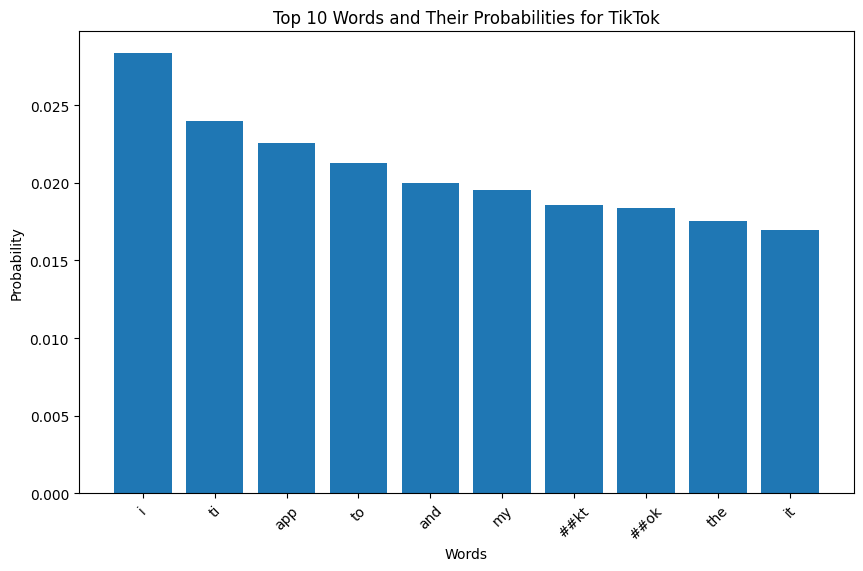

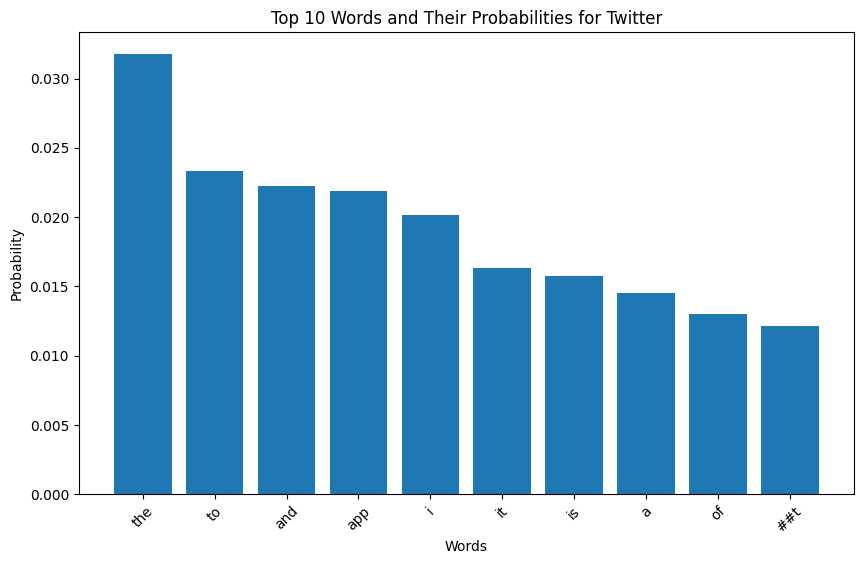

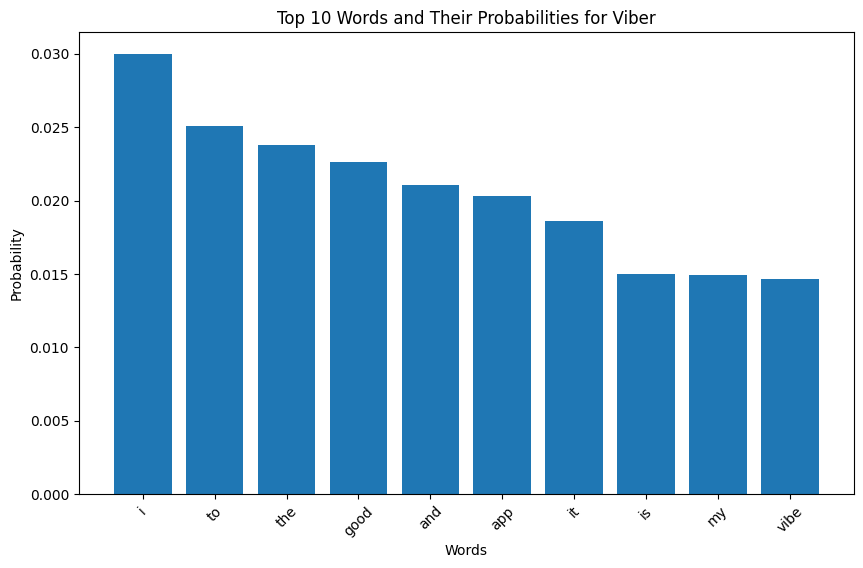

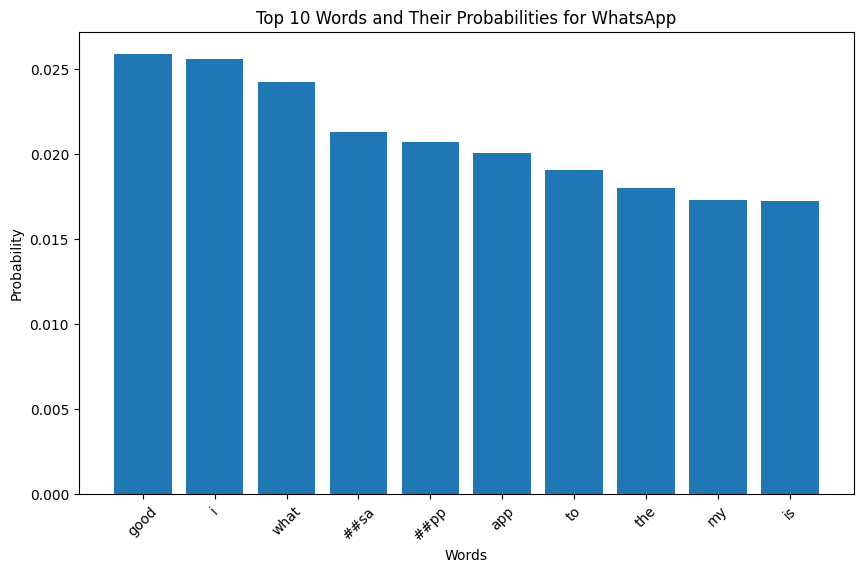

In [127]:
# Group by app (or category)
grouped_df = df.groupby('app')  # Change 'app' to your column name

# Function to get top 10 words and their probabilities
def get_top_words(tokens):
    # Count frequencies
    word_freq = Counter(tokens)
    
    # Total number of words
    total_words = sum(word_freq.values())
    
    # Compute probabilities
    word_prob = {word: freq / total_words for word, freq in word_freq.items()}
    
    # Get top 10 words
    top_words = dict(sorted(word_prob.items(), key=lambda item: item[1], reverse=True)[:10])
    
    return top_words

# Plot bar graphs for each app
for app, group in grouped_df:
    # Combine all tokens for this app
    all_tokens = [token for sublist in group['tokens'] for token in sublist]
    
    # Get top words and their probabilities
    top_words = get_top_words(all_tokens)
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.bar(top_words.keys(), top_words.values())
    plt.xlabel('Words')
    plt.ylabel('Probability')
    plt.title(f'Top 10 Words and Their Probabilities for {app}')
    plt.xticks(rotation=45)
    plt.show()

### Calculating sentiment score

In [128]:
# Define a function to get sentiment polarity
def get_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis
df['sentiment_score'] = df['content'].apply(get_sentiment)

# Categorize sentiment based on polarity
df['sentiment_label'] = df['sentiment_score'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
)

print(df.head())


                               reviewId  \
0  21ab88b4-baad-40b4-a52c-13ebae1e1d7e   
1  a099874d-04f2-4cf3-bfd9-61d6ab33dc29   
2  16ccf4b6-82f9-4427-aaba-86378233c708   
3  96fc9efd-b955-42d3-ad12-c320199820be   
4  2059a7da-9d5c-4f63-9652-3e58c900fa3d   

                                             content  score       app  \
0                                               Good      5  Facebook   
1                                 My choice facebook      5  Facebook   
2                                          Nice Apps      5  Facebook   
3  reason I do NOT WANT AI in any shape or form, ...      2  Facebook   
4                                      nice Facebook      5  Facebook   

                                              tokens  sentiment_score  \
0                                             [good]              0.7   
1                             [my, choice, facebook]              0.0   
2                                       [nice, apps]              0.6   
3  [reason

### Bar graph showing average sentiment score for each app

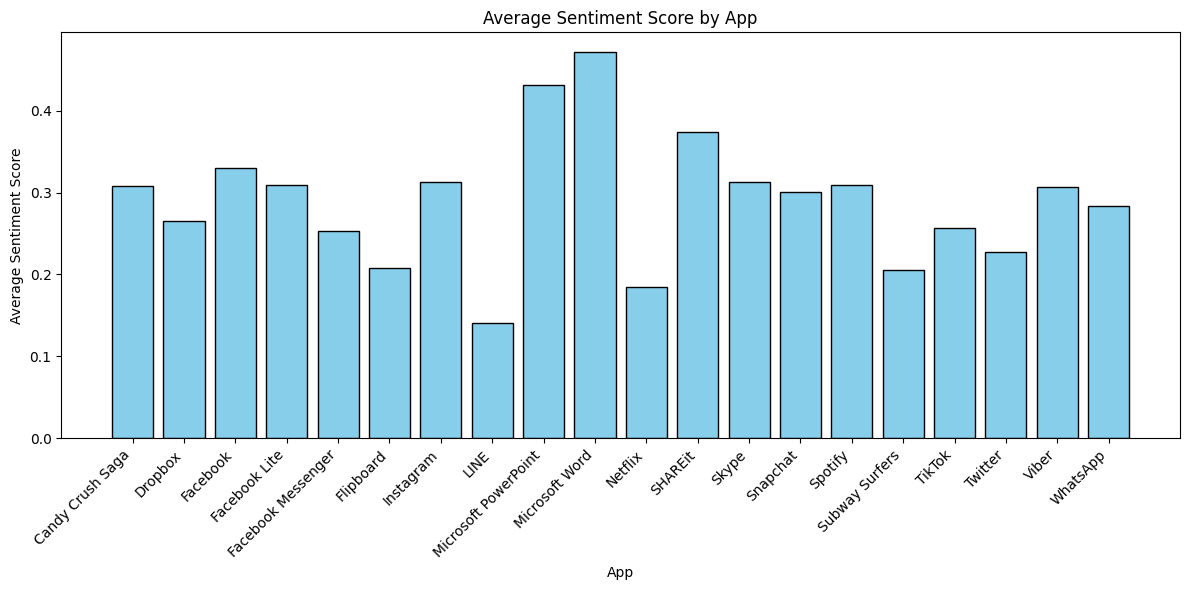

In [129]:

# Group by app and calculate mean sentiment score
grouped_df = df.groupby('app').agg({
    'sentiment_score': 'mean'
}).reset_index()

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(grouped_df['app'], grouped_df['sentiment_score'], color='skyblue', edgecolor='black')
plt.xlabel('App')
plt.ylabel('Average Sentiment Score')
plt.title('Average Sentiment Score by App')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Conclusion

After analyzing the dataset we have got answers to some of the serious & interesting facts which any of the android users would love to know.

a) Top 20 Highest rating Apps in google play store 

b) Relation between app and score

c) The review based on sentiment analysis

The Google Play Store Apps report provides some useful insights regarding the trending of the apps in the play store. As per the graphs visualizations shown above, the charts shown above actually implies that most of the apps having good ratings of above 4.0 are mostly confirmed to have high amount of reviews and user installs.
 Futhermore, most of the apps that are having high amount of reviews are for candy crush saga,subway surf etc.
 From the sentiment analysis it is clear that the overall content review is positive.Of all apps positive reviews are more for candy crush saga and microsoft word etc.